In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/karan_kant2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
PATH = "../chrc_data_segments/"
sz=256

In [20]:
torch.cuda.is_available()

True

In [21]:
os.listdir(PATH)

['train', 'valid', 'tmp', 'models', '.ipynb_checkpoints']

In [22]:
files = os.listdir(f'{PATH}valid/Celiac')[:5]
files

['C11-54_02_7326_18981.jpg',
 'C11-55_01_8500_4500.jpg',
 'C14-71_01_3330_2331.jpg',
 'C10-51_02_9657_3330.jpg',
 'C11-55_01_4329_1332.jpg']

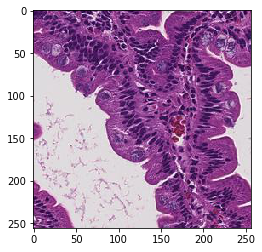

In [23]:
img = plt.imread(f'{PATH}valid/Celiac/{files[0]}')
plt.imshow(img);

In [13]:
### Fine-tuning and differential learning rate annealing 
#Now that we have a good final layer trained, we can try fine-tuning 
#the other layers. To tell the learner that we want to unfreeze the remaining 
#layers, just call (surprise surprise!) `unfreeze()`.

In [ ]:
#implement data augmentation

In [44]:
tfms = tfms_from_model(vgg16, sz, aug_tfms=transforms_side_on+[RandomDihedral()], max_zoom=1.1)

In [45]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [46]:
ims = np.stack([get_augs() for i in range(6)])

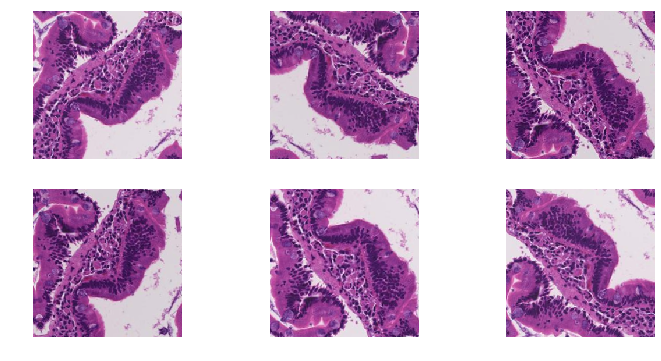

In [47]:
plots(ims, rows=2)

In [ ]:
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots

In [ ]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [ ]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64
# Import our class, and instantiate
from vgg16 import Vgg16# Import our class, and instantiate
from vgg16 import Vgg16
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=4)

In [ ]:
vgg.model.save_weights(path+'results/ft1.h5')